In [1]:
using Pkg
Pkg.activate("../Tambo/")
using Tambo

  Activating project at `~/research/TAMBO-MC/Tambo`


In [27]:
using Plots
using JLD2
# using PyCall
using StaticArrays
using StatsBase

In [4]:
# const pq = PyNULL()
# const np = PyNULL()
# copy!(pq, pyimport("pyarrow.parquet"))
# copy!(np, pyimport("numpy"))

In [23]:
sim = jldopen("/Users/jlazar/Downloads/GraphNet_00000_00395.jld2")
config = SimulationConfig(; Dict(k=>v for (k, v) in sim["config"] if k != :geo_spline_path)...)
geo = Tambo.Geometry(config)
plane = Tambo.Plane(whitepaper_normal_vec, whitepaper_coord, geo)

const altmin = 1.8925255158436627units.km
const altmax = 4.092525515843662units.km

event_dicts = jldopen("/Users/jlazar/Downloads/test2_3_300.jld2")
# const ycorsika = SVector{3}([0.89192975455881607, 0.18563051261662877, -0.41231374670066206])
# const xcorsika = SVector{3}([0, -0.91184756344828699, -0.41052895273466672])
# const zcorsika = whitepaper_normal_vec.proj
# const xyzcorsika = inv([
#     xcorsika.x xcorsika.y xcorsika.z;
#     ycorsika.x ycorsika.y ycorsika.z;
#     zcorsika.x zcorsika.y zcorsika.z;
# ]);

JLDFile /Users/jlazar/Downloads/test2_3_300.jld2 (read-only)
 └─📂 2000.0_100.0
    ├─🔢 27
    ├─🔢 5550
    ├─🔢 11423
    ├─🔢 16770
    ├─🔢 21816
    ├─🔢 27193
    ├─🔢 32691
    ├─🔢 38894
    └─ ⋯ (5 more entries)

In [24]:
modules = Tambo.make_detector_array(
    whitepaper_coord,
    2units.km,
    100units.m,
    altmin,
    altmax,
    plane,
    geo
);

In [16]:
# include("../scripts/utils.jl")

In [17]:
# pqf = pq.ParquetFile("/Users/jlazar/Downloads/particles_27_1.parquet")

In [18]:
# 

In [19]:
# corsika_events = loadcorsika(pqf.read())[1:100:end]

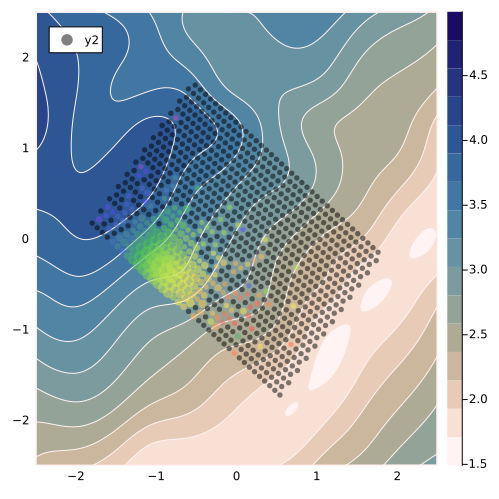

In [34]:
event_dict = event_dicts["2000.0_100.0"]["5550"]

tmin, tmax = Inf, -Inf
for (idx, evts) in event_dict
    for evt in evts
        tmin = minimum([evt.time, tmin])
        tmax = maximum([evt.time, tmax])
    end
end

ts = LinRange(tmin, tmax, 100)

time_cs = cgrad(:lightrainbow, rev=true)
hit_color(t) = get(time_cs, (t - tmin) / (tmax - tmin))


colors = fill(colorant"black", length(modules))
markersize = fill(3.0, length(modules))
for (idx, evts) in event_dict

    colors[idx] = hit_color(mean(getfield.(evts, :time)))
    markersize[idx] = 3 + log(length(evts))
end

contour_xs = LinRange(-2.5, 2.5, 201) .* units.km
contour_ys = LinRange(-2.5, 2.5, 200) .* units.km

plt = plot(size=(500, 500), xlimits=(first(contour_xs), last(contour_xs))./units.km, ylimits=(first(contour_ys), last(contour_ys))./units.km)

contour!(
    plt,
    contour_xs ./ units.km,
    contour_ys ./ units.km,
    @. (geo(contour_xs', contour_ys) + geo.tambo_offset[3]) / units.km;
    fill=true,
    color=palette(:lapaz, rev=true),
    clims=(-1.5+geo.tambo_offset[3]/units.km, 2+geo.tambo_offset[3]/ units.km)
)

scatter!(
    plt,
    getindex.(getfield.(modules, :pos), 1) ./ units.km,
    getindex.(getfield.(modules, :pos), 2) ./ units.km,
    alpha=0.5,
    markersize=markersize,
    color=colors,
    markerstrokewidth=0
)
    
# savefig(plt, "../scratch_figures/gif_event_display_$(lpad(plt_n, 3, '0')).png")


In [40]:
event_dict[279]

8043-element Vector{Tambo.CorsikaEvent}:
 Tambo.CorsikaEvent(22, 1.1183528900146484e9, [-4.7162345883681755e9, -1.5717493457984633e9, 1.9144651975831773e9], 1.8327041409740417e10, 1.0)
 Tambo.CorsikaEvent(22, 4.12580743432045e7, [-4.719544075666396e9, -1.5671763587336476e9, 1.9183640137358086e9], 1.8332749121894035e10, 1.0)
 Tambo.CorsikaEvent(22, 1.2478850036859512e8, [-4.718024514476116e9, -1.568690459614687e9, 1.9168375073094816e9], 1.8330546264997974e10, 1.0)
 Tambo.CorsikaEvent(22, 7.943223118782043e8, [-4.718292120568086e9, -1.572822597348087e9, 1.9151259315249722e9], 1.8328477830035778e10, 1.0)
 Tambo.CorsikaEvent(22, 6.814614869654179e6, [-4.722015431719869e9, -1.5691950165696971e9, 1.918829184376678e9], 1.8334123137154625e10, 1.0)
 Tambo.CorsikaEvent(-11, 1.778746396303177e8, [-4.715198925203994e9, -1.5712109320362904e9, 1.9141318010214958e9], 1.8326654238574524e10, 1.0)
 Tambo.CorsikaEvent(22, 1.375894695520401e8, [-4.716277626048945e9, -1.5731825160099645e9, 1.91384388822789

[ Info: Saved animation to /Users/jlazar/research/TAMBO-MC/notebooks/tmp.gif


Plots.AnimatedGif("/Users/jlazar/research/TAMBO-MC/notebooks/tmp.gif")
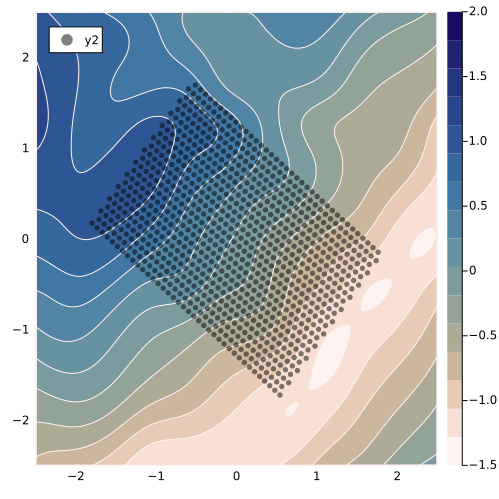

In [37]:
event_dict = event_dicts["2000.0_100.0"]["5550"]

tmin, tmax = Inf, -Inf
for (idx, evts) in event_dict
    for evt in evts
        tmin = minimum([evt.time, tmin])
        tmax = maximum([evt.time, tmax])
    end
end

ts = LinRange(tmin, tmax, 100)

time_cs = cgrad(:lightrainbow)
hit_color(t) = get(time_cs, (t - tmin) / (tmax - tmin))

@gif for (plt_n, t) in enumerate(ts)

    colors = fill(colorant"black", length(modules))
    markersize = fill(3.0, length(modules))
    for (idx, evts) in event_dict
        evts = filter(e->e.time < t, evts)
        
        if length(evts)==0
            continue
        end
        
        colors[idx] = hit_color(mean(getfield.(evts, :time)))
        markersize[idx] = 3 + log(length(evts))
        # markersize[idx] = 3 + 0.01 * length(evts)
    end

    contour_xs = LinRange(-2.5, 2.5, 201) .* units.km
    contour_ys = LinRange(-2.5, 2.5, 200) .* units.km

    plt = plot(size=(500, 500), xlimits=(first(contour_xs), last(contour_xs))./units.km, ylimits=(first(contour_ys), last(contour_ys))./units.km)

    contour!(
        plt,
        contour_xs ./ units.km,
        contour_ys ./ units.km,
        @. geo(contour_xs', contour_ys) / units.km;
        fill=true,
        color=palette(:lapaz, rev=true),
        clims=(-1.5, 2)
    )

    scatter!(
        plt,
        getindex.(getfield.(modules, :pos), 1) ./ units.km,
        getindex.(getfield.(modules, :pos), 2) ./ units.km,
        alpha=0.5,
        markersize=markersize,
        color=colors,
        markerstrokewidth=0
    )
    
    savefig(plt, "../scratch_figures/gif_event_display_$(lpad(plt_n, 3, '0')).png")
end

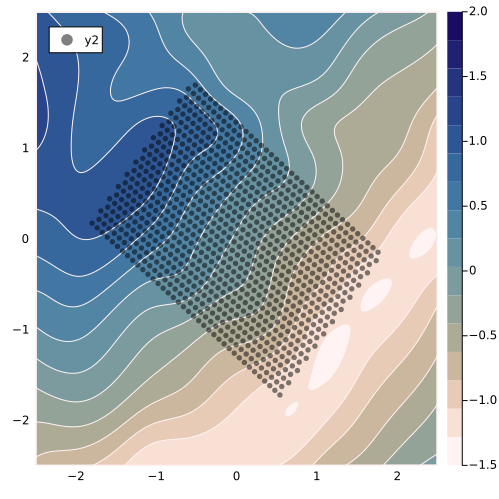

In [117]:
contour_xs = LinRange(-2.5, 2.5, 201) .* units.km
contour_ys = LinRange(-2.5, 2.5, 200) .* units.km

plt = plot(size=(500, 500), xlimits=(first(contour_xs), last(contour_xs))./units.km, ylimits=(first(contour_ys), last(contour_ys))./units.km)

contour!(
    plt,
    contour_xs ./ units.km,
    contour_ys ./ units.km,
    @. geo(contour_xs', contour_ys) / units.km;
    fill=true,
    color=palette(:lapaz, rev=true),
    clims=(-1.5, 2)
)

scatter!(
    plt,
    getindex.(getfield.(modules, :pos), 1) ./ units.km,
    getindex.(getfield.(modules, :pos), 2) ./ units.km,
    alpha=0.5,
    markersize=markersize,
    color=colors,
    markerstrokewidth=0
)

# scatter!(
#     plt,
#     getindex.(getfield.(corsika_events, :pos), 1) ./ units.km,
#     getindex.(getfield.(corsika_events, :pos), 2) ./ units.km,
#     alpha=0.5,
#     markersize=3,
#     color="green",
#     markerstrokewidth=0
# )